In [12]:
import pandas as pd

df = pd.read_json('frequent_itemsets.json')

In [24]:
df1 = df[(df['length']==1)].sort_values(by='support',ascending=False)[0:30]
df1
df1 = df1['itemsets']
itemlist = []
for row in list(df1):
    itemlist.append(row[0])
itemlist

['Machine Learning',
 'Neuroscience',
 'computer vision',
 'Artificial Intelligence',
 'Molecular Biology',
 'Microbiology',
 'Data Mining',
 'Biochemistry',
 'Cancer',
 'Deep Learning',
 'Condensed matter physics',
 'Immunology',
 'Robotics',
 'Bioinformatics',
 'Genetics',
 'climate change',
 'evolution',
 'Statistics',
 'Biophysics',
 'structural biology',
 'Data Science',
 'Ecology',
 'Computational Biology',
 'Distributed Systems',
 'Drug Discovery',
 'Optimization',
 'Genomics',
 'Biomedical Engineering',
 'health',
 'Race']

In [40]:
import pymysql
connect = pymysql.connect(
			host = 'localhost',
			db = 'GoogleScholars',
			user = 'root',
			passwd = '')
cur = connect.cursor()

cur.execute('''SELECT id, name from interests''')
iList = []
for row in cur:
    if str(row[1]) not in itemlist: continue
    iList.append(int(row[0]))


,12,13,15,20,38,40,43,44,46,50,...,624,629,630,717,804,850,869,1224,1657,name


In [88]:
cur.execute('''SELECT DISTINCT Aid, name, Iid
				FROM authors_to_interests 
				INNER JOIN authors 
				on authors_to_interests.Aid = authors.id
				WHERE Iid != 18''')
index = []
mydict = dict()
for row in cur:
    if int(row[2]) not in iList: continue # only include authors with interests in frequent_itemsets
    if str(row[1]) not in index:
        index.append(str(row[1]))
        mydict[str(row[1])] = []
    mydict[str(row[1])].append(int(row[2]))    

{'Peter Meer': [12],
 'tomasz imielinski': [13],
 'Stephen K. Burley, M.D., D.Phil.': [15],
 'Peter Smouse': [20],
 'Sang-Wook Cheong': [38],
 'Rohit Aita': [40, 43, 44],
 'RUI WANG': [46],
 'Ghanashyam Khanal': [38],
 'Weizhi Wang': [12, 50],
 'CHENGYUAN DENG': [50],
 'Marilyn Baffoe-Bonnie': [40],
 'Xin Yang': [50],
 'Shaleen Garg': [100],
 'Himanshu Jain': [13, 50],
 'Ayman Saleh': [12, 139, 140],
 'Caio Mattos': [151],
 'Arun Sharma': [46, 153],
 'Shahab Raji': [46, 50],
 'Merrill Edmonds': [139],
 'Andrew Dieterich': [194],
 'Guangyan Hu': [50, 100],
 'Ryan J. Almeida': [151],
 'Pedro Cesar Lopes Gerum': [50],
 'Cheng Li': [100, 100],
 'Konstantinos Nikolakakis': [20, 50],
 'Jonathan Pulliza': [50],
 'AT Guarino': [194, 329],
 'Jennifer Vilchez': [338],
 'Yunhe Gao': [12],
 'BHARGAV GOKALGANDHI': [50],
 'Rajarshi Bhowmik': [140],
 'Yuqian Zhang': [12, 50, 624, 12, 50, 624],
 'Matthew Purri': [12, 50, 140],
 'Aravind Sivaramakrishnan': [50, 139],
 'Kyle Hunte': [139],
 'chintan dal

In [98]:
df2 = pd.DataFrame(index=index, columns=iList)
df2 = df2.fillna(0)
for (k,v) in mydict.items():
    df2.loc[[k],v] = 1
df2

,12,13,15,20,38,40,43,44,46,50,...,615,624,629,630,717,804,850,869,1224,1657
Peter Meer,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tomasz imielinski,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Stephen K. Burley, M.D., D.Phil.",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Peter Smouse,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sang-Wook Cheong,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Darrin M. York,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Dimitris N. Metaxas,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Steven R Brant,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
David Vanderbilt,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(df2)


print(pca.explained_variance_)  

[0.19578987 0.11113934 0.07057706 0.06710402 0.05170358 0.05041697
 0.04611461 0.04534071 0.04069933 0.03984541 0.03723708 0.03617589
 0.03324833 0.03290693 0.03096412 0.0304876  0.02897169 0.02837713
 0.02740866 0.02649233 0.02618591 0.02525177 0.02390894 0.02309597
 0.02237522 0.02231658 0.02111364 0.02067351 0.01954669 0.00704759]


In [113]:
pca.n_components = 2
df2_reduced = pca.fit_transform(df2)
df2_reduced.shape

(582, 2)

In [132]:
df2_reduced

array([[ 0.19632296, -0.0450892 ],
       [-0.08215318, -0.14753211],
       [-0.18027377, -0.16520223],
       ...,
       [-0.22139139, -0.16661088],
       [-0.20183282, -0.23953916],
       [-0.21047458, -0.25488276]])

In [123]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df2_reduced)

array([4, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 4, 0, 0, 3, 0, 2, 3, 0,
       3, 0, 3, 3, 2, 0, 4, 3, 0, 1, 1, 3, 0, 3, 0, 3, 4, 1, 0, 4, 3, 0,
       4, 0, 0, 1, 3, 3, 0, 2, 0, 3, 0, 0, 4, 0, 0, 1, 0, 2, 0, 3, 1, 0,
       2, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 1, 4, 3, 0, 0, 0, 3,
       0, 2, 3, 3, 0, 3, 0, 2, 3, 0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 3, 3, 0,
       2, 0, 3, 0, 3, 0, 2, 3, 0, 0, 0, 0, 2, 3, 1, 3, 2, 3, 3, 2, 0, 2,
       0, 3, 0, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 3, 4, 0, 3, 0,
       1, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 0, 1, 2, 0, 0, 2, 0, 0, 3,
       0, 0, 0, 3, 4, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2,
       0, 0, 3, 0, 0, 0, 1, 0, 0, 3, 2, 0, 1, 2, 3, 0, 0, 0, 0, 3, 4, 0,
       2, 0, 3, 0, 3, 1, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 4, 0,
       0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3,
       1, 2, 3, 2, 3, 0, 0, 2, 2, 0, 0, 0, 4, 3, 0,

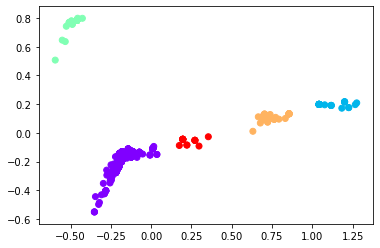

In [164]:
plt.scatter(df2_reduced[:,0],df2_reduced[:,1], c=cluster.labels_, cmap='rainbow')
# temp_labels = []
# count = 0
# for name, label, x, y in zip(index, cluster.labels_, df2_reduced[:, 0], df2_reduced[:, 1]):
# #     if count < 50:
# #         count = count + 1
# #         continue
#     if label not in temp_labels:
#         plt.annotate(
#             name,
#             xy=(x, y))
#         temp_labels.append(label)
#     if len(temp_labels) == 5: break


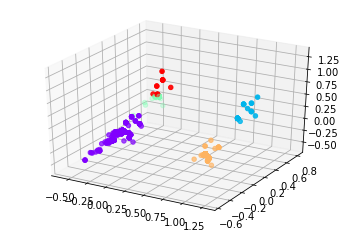

In [130]:
pca.n_components = 3
df2_reduced3 = pca.fit_transform(df2)
df2_reduced3.shape

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df2_reduced3)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(df2_reduced3[:,0],df2_reduced3[:,1],df2_reduced3[:,2], c=cluster.labels_, cmap='rainbow')

In [108]:
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df2_reduced)


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [160]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df2.loc[['Mingwen Dong']])


,12,13,15,20,38,40,43,44,46,50,100,139,140,151,153,194,329,338,490,541,615,624,629,630,717,804,850,869,1224,1657
Mingwen Dong,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
